## Initilization

In [1]:
import seaborn as sns

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import pandasql as ps


Loading the data

In [2]:
wc_data = pd.read_csv("Data/Fifa_world_cup_matches.csv")

wc_data.head(5)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


# Total goal scored for each nation


In [3]:
# making a smaller, more useful dataframe that will include what we want

wc_small_data = wc_data[["team1", "team2", "possession team1", "possession team2", "possession in contest", "number of goals team1", "number of goals team2"]]

wc_small_data.head(5)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2
0,QATAR,ECUADOR,42%,50%,8%,0,2
1,ENGLAND,IRAN,72%,19%,9%,6,2
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2
3,UNITED STATES,WALES,51%,39%,10%,1,1
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2


We change the name of the longer names to make it simpler

In [4]:
wc_small_data.columns = ["team1", "team2", "pos team1", "pos team2", "pos contest", "goals team1", "goals team2"]

wc_small_data.head(5)

,team1,team2,pos team1,pos team2,pos contest,goals team1,goals team2
0,QATAR,ECUADOR,42%,50%,8%,0,2
1,ENGLAND,IRAN,72%,19%,9%,6,2
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2
3,UNITED STATES,WALES,51%,39%,10%,1,1
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2


We will do this simple by splitting our dataframe into 2 spots and aggregate them later to get something useful

In [44]:
#split into two dataframes

team_1 = wc_small_data[['team1','goals team1']]
team_2 = wc_small_data[['team2', 'goals team2']]

agg_1 = team_1.groupby('team1').sum()
agg_2 = team_2.groupby('team2').sum()

agg_1 = agg_1.reset_index()
agg_2 = agg_2.reset_index()


# join the 2 datasets backtogether by the team columns

agg_joined = pd.merge(agg_1, agg_2, left_on = 'team1', right_on = 'team2', how = "inner")

agg_joined

# sum the goal columns into a total column
goals_data = agg_joined.assign(total_goals=agg_joined['goals team1'] + agg_joined['goals team2'])

# select only the columns we need and rename
goals_data = goals_data[['team1', 'total_goals']]

goals_data.columns = ["Teams", "Total goals"]

,team1,goals team1
0,QATAR,0
1,ENGLAND,6
2,SENEGAL,0
3,UNITED STATES,1
4,ARGENTINA,1
...,...,...
59,ENGLAND,1
60,ARGENTINA,3
61,FRANCE,2
62,CROATIA,2


Plotting the data in terms of total goals and teams

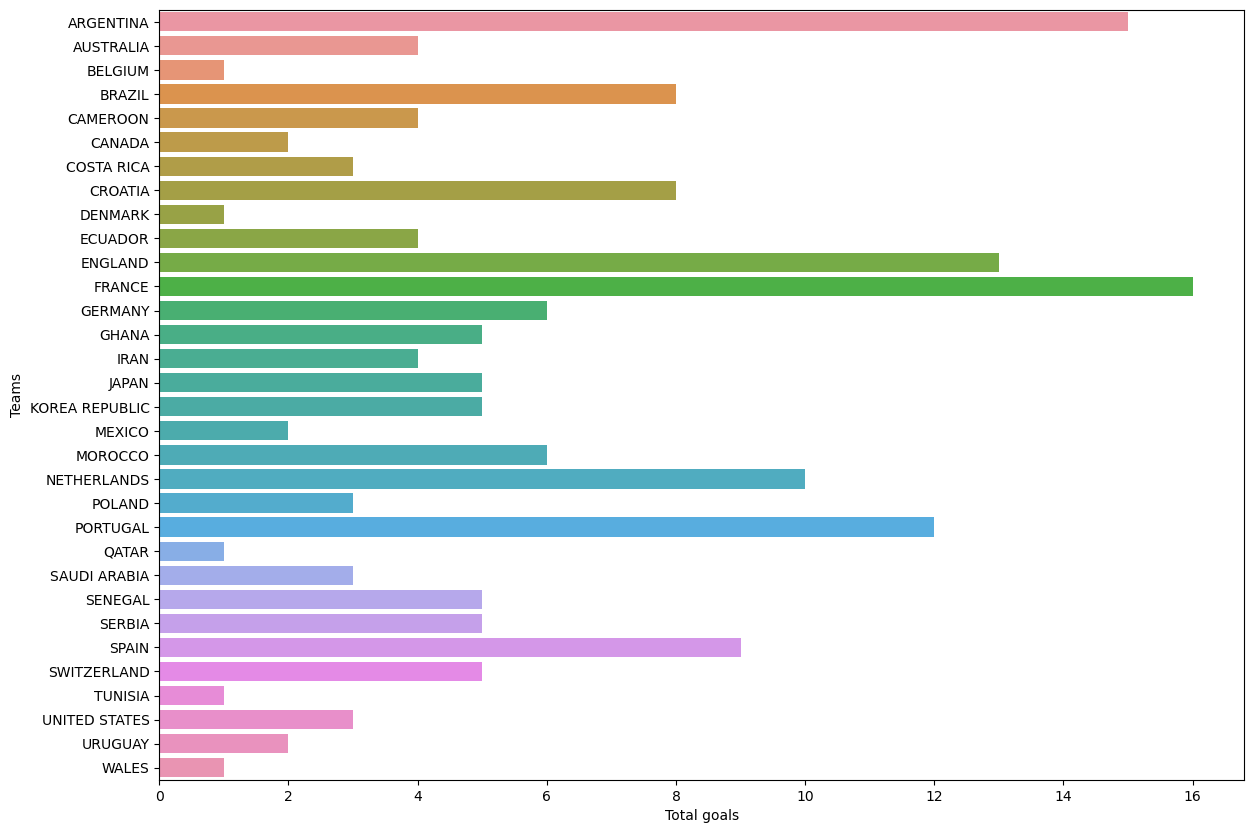

In [59]:
plt.figure(figsize=(14,10))
sns.barplot(
    data=goals_data, x="Total goals", y="Teams"
)
plt.show()

## Who had high possesion percentage? Does that and goal scored look like to be correlated?

We will use the WC_small_data

In [14]:
wc_small_data

,team1,team2,pos team1,pos team2,pos contest,goals team1,goals team2
0,QATAR,ECUADOR,42%,50%,8%,0,2
1,ENGLAND,IRAN,72%,19%,9%,6,2
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2
3,UNITED STATES,WALES,51%,39%,10%,1,1
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2
...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2
60,ARGENTINA,CROATIA,34%,54%,12%,3,0
61,FRANCE,MOROCCO,34%,55%,11%,2,0
62,CROATIA,MOROCCO,45%,45%,10%,2,1


Our Possession columns are string-types, we need to convert them to integers by removing the percentage sign.

In [48]:
wc_small_data.loc[:,["pos team1", "pos team2", "pos contest"]] = wc_small_data.loc[:,["pos team1", "pos team2", "pos contest"]].replace("%","").astype(int)

wc_small_data.head(10)

C:\Users\emirh\AppData\Local\Temp\ipykernel_1220\1990856550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_small_data.loc[:,["pos team1", "pos team2", "pos contest"]] = wc_small_data.loc[:,["pos team1", "pos team2", "pos contest"]].replace("%","").astype(int)


,team1,team2,pos team1,pos team2,pos contest,goals team1,goals team2
0,QATAR,ECUADOR,42,50,8,0,2
1,ENGLAND,IRAN,72,19,9,6,2
2,SENEGAL,NETHERLANDS,44,45,11,0,2
3,UNITED STATES,WALES,51,39,10,1,1
4,ARGENTINA,SAUDI ARABIA,64,24,12,1,2
5,DENMARK,TUNISIA,55,33,12,0,0
6,MEXICO,POLAND,54,31,15,0,0
7,FRANCE,AUSTRALIA,56,35,9,4,1
8,MOROCCO,CROATIA,32,57,12,0,0
9,GERMANY,JAPAN,65,22,13,1,2


In [67]:
pos_1 = wc_small_data[['team1','pos team1']] # team 1 with their possession
pos_2 = wc_small_data[['team2', 'pos team2']] # team 2 with their possession

agg_1 = pos_1.groupby('team1').mean() # calculating the mean for 
agg_2 = pos_2.groupby('team2').mean()

agg_1 = agg_1.reset_index()
agg_2 = agg_2.reset_index()


# join the 2 datasets backtogether by the team columns

agg_joined = pd.merge(agg_1, agg_2, left_on = 'team1', right_on = 'team2', how = "inner")

agg_joined


# sum the goal columns into a total column
pos_data = agg_joined.assign(avg_pos=(agg_joined['pos team1'] + agg_joined['pos team2']) / 2)

# select only the columns we need and rename
pos_data = pos_data[['team1', 'avg_pos']]

pos_data.columns = ["Teams", "average pos (%)"]



,Teams,average pos
0,ARGENTINA,52.450000
1,AUSTRALIA,28.833333
2,BELGIUM,49.000000
3,BRAZIL,50.416667
4,CAMEROON,40.250000
5,CANADA,48.250000
6,COSTA RICA,27.500000
7,CROATIA,48.750000
8,DENMARK,53.500000
9,ECUADOR,47.750000


We make a barplot like we did previously

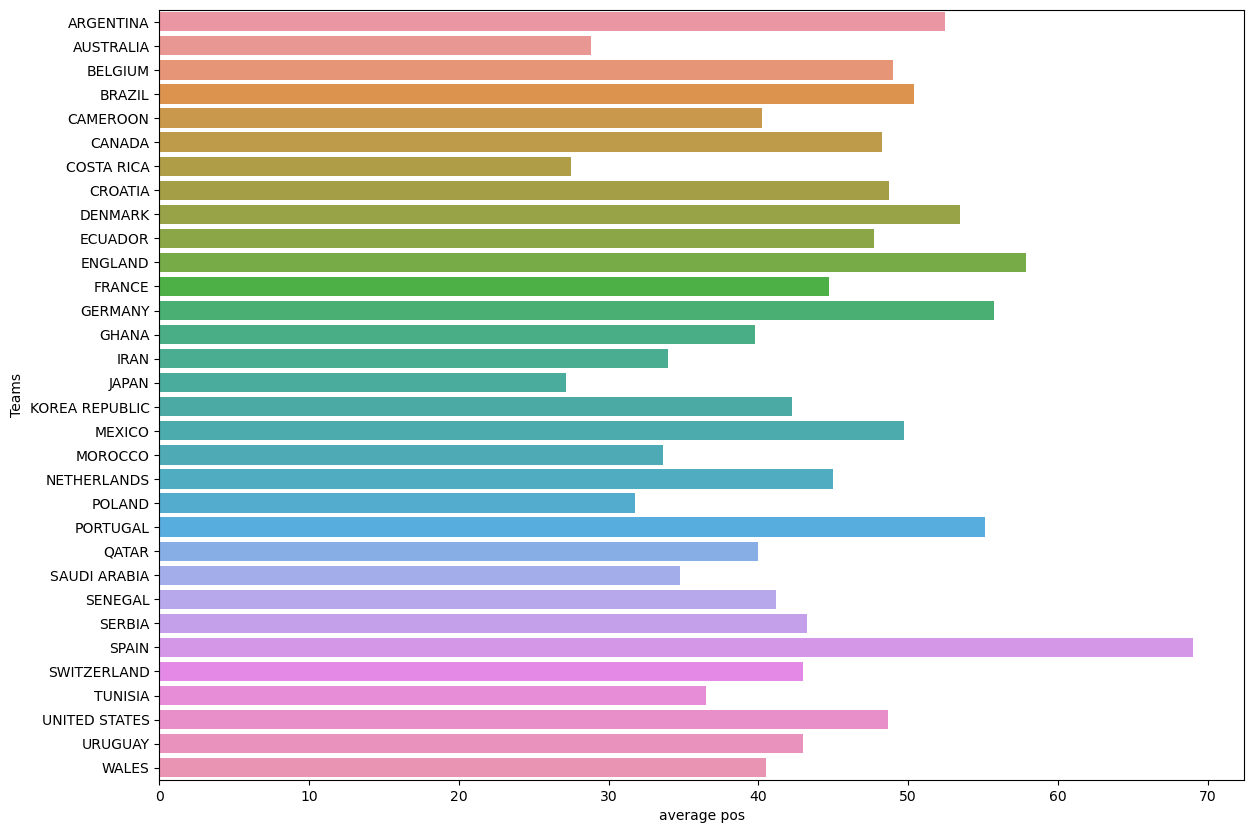

In [68]:
plt.figure(figsize=(14,10))
sns.barplot(
    data=pos_data, x="average pos", y="Teams"
)
plt.show()